In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [46]:
def simple_inventory(s_max, s_min, demand):
  l = [0]*(len(demand)+1)
  l[0] = s_max
  o = [0]*(len(demand) + 1)
  demand = [0] + demand
  for i in range(1, len(demand)):
    if l[i-1] < s_min:
      o[i-1] = s_max - l[i-1]
    else:
      o[i-1] = 0
    l[i] = l[i-1] + o[i-1] - demand[i]
  o[-1] = s_max - l[-1]
  l[-1] = s_max
  return l,o

In [47]:
demand =[20,15,18,15,8,10,12,9,14,20,15,18,9,8,15,8,10,13,17,9,20,9,13,8,15,18,20,15,8,20]
s_min =30
s_max = 80
l,o = simple_inventory(s_max, s_min, demand)
l_prime = [l[i] + o[i] if l[i] != 80 else l[i] for i in range(len(l))]

df = pd.DataFrame(data={'l':l,'o':o,'l_prime':l_prime})
df.index = df.index.set_names(['period'])
df = df.reset_index().rename(columns={df.index.name:'period'})
df

,period,l,o,l_prime
0,0,80,0,80
1,1,60,0,60
2,2,45,0,45
3,3,27,53,80
4,4,65,0,65
5,5,57,0,57
6,6,47,0,47
7,7,35,0,35
8,8,26,54,80
9,9,66,0,66


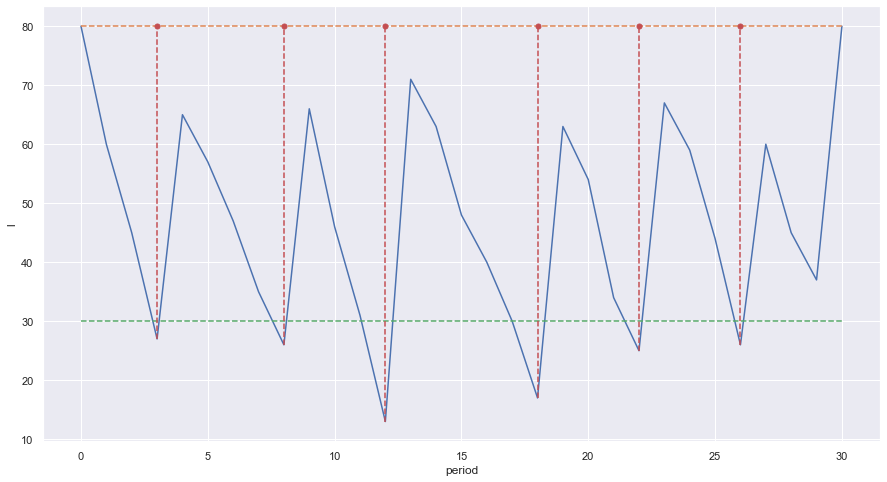

In [48]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df, x='period', y="l")
ax.plot([0, 30], [s_max, s_max], '--')
ax.plot([0, 30], [s_min, s_min], '--')
ax.plot([3, 3], [df['l'].iloc[3], s_max], 'r--')
ax.plot([8, 8], [df['l'].iloc[8], s_max], 'r--')
ax.plot([12, 12], [df['l'].iloc[12], s_max], 'r--')
ax.plot([18, 18], [df['l'].iloc[18], s_max], 'r--')
ax.plot([22, 22], [df['l'].iloc[22], s_max], 'r--')
ax.plot([26, 26], [df['l'].iloc[26], s_max], 'r--')
ax.plot([3], [s_max], 'r.', markersize=10)
ax.plot([8], [s_max], 'r.', markersize=10)
ax.plot([12], [s_max], 'r.', markersize=10)
ax.plot([18], [s_max], 'r.', markersize=10)
ax.plot([22], [s_max], 'r.', markersize=10)
ax.plot([26], [s_max], 'r.', markersize=10)
plt.show()

In [38]:
print(o) #Ordenes al proovedor
print(l) #Nivel de inventario
print(l_prime)

[0, 0, 0, 53, 0, 0, 0, 0, 54, 0, 0, 0, 67, 0, 0, 0, 0, 0, 63, 0, 0, 0, 55, 0, 0, 0, 54, 0, 0, 0, 63]
[80, 60, 45, 27, 65, 57, 47, 35, 26, 66, 46, 31, 13, 71, 63, 48, 40, 30, 17, 63, 54, 34, 25, 67, 59, 44, 26, 60, 45, 37, 80]
[80, 60, 45, 80, 65, 57, 47, 35, 80, 66, 46, 31, 80, 71, 63, 48, 40, 30, 80, 63, 54, 34, 80, 67, 59, 44, 80, 60, 45, 37, 80]


In [39]:
print(np.mean(demand)) #Promedio de demandas
print(np.mean(o[1:]))

13.633333333333333
13.633333333333333


In [43]:
h_l = [(l_prime[i]**2)/(2*demand[i]) for i in range(len(l_prime)-1)]
s_l = [((demand[i] - l_prime[i])**2)/(2*demand[i]) for i in range(len(l_prime)-1)]
print(sum(h_l)/len(h_l))
print(sum(s_l)/len(s_l))

143.85327252268434
93.10327252268429


In [93]:
def compute_job_avg_statistics(demand,l_prime,s_l):

    num=30 #cantidad intervalos de tiempo
    ordenado_cliente = ((np.mean(demand))/num) #demanda media
    Frec_pedidos = (num /np.mean(demand)) #frecuencia de los pedidos
    tplus = ((np.mean(l_prime)**(2)))/2*(np.mean(s_l)) #nivel de retención promediado en el tiempo
    tmenos= ((np.mean(s_l) -(np.mean(l_prime)))**2) / (np.mean(s_l)) #nivel de escasez promediado en el tiempo
    
    item_cost = 400 * ordenado_cliente
    setup_cost = 11000*Frec_pedidos
    cost_hold = 3000*tplus
    cost_short = 2000*tmenos
           
    return [ordenado_cliente,
            Frec_pedidos,
            tplus,
           tmenos,
           item_cost,
           setup_cost,
           cost_hold,
           cost_short]

job_avg_statistics = compute_job_avg_statistics(demand,l_prime,s_l)

print(f'Frecuencia de los pedidos: {job_avg_statistics[0]}')
print(f'Nivel de retención promediado en el tiempo: {job_avg_statistics[1]}')
print(f'Nivel de escasez promediado en el tiempo: {job_avg_statistics[2]}')
print(f'Nivel de escasez promediado en el tiempo: {job_avg_statistics[3]}')
print(f'Costo por item: {job_avg_statistics[4]}')
print(f'Costo de preparacion: {job_avg_statistics[5]}')
print(f'Costo de retencion: {job_avg_statistics[6]}')
print(f'Short cost: {job_avg_statistics[7]}')

#El costo del artículo es citem = $400 por artículo
#El coste de instalación es csetup = $11000
#El coste de mantenimiento es chold = 3000$ por semana
#El coste de escasez es cshort = $2000 por semana

Frecuencia de los pedidos: 0.45444444444444443
Nivel de retención promediado en el tiempo: 2.2004889975550124
Nivel de escasez promediado en el tiempo: 158171.36706629675
Nivel de escasez promediado en el tiempo: 13.017173841785606
Costo por item: 181.77777777777777
Costo de preparacion: 24205.378973105137
Costo de retencion: 474514101.19889027
Short cost: 26034.347683571214
